In [23]:
import pandas as pd
import numpy as np

RIAUS = pd.read_csv(r'../input/weather-dataset-rattle-package/weatherAUS.csv')
RIAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
RIAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [25]:
RIAUS.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [26]:
RIAUS.drop(['Date'], axis = 1, inplace = True)

In [27]:
num_cols = [cols for cols in RIAUS.columns if RIAUS[cols].dtype in ['int64', 'float64']]
cat_cols = [cols for cols in RIAUS.columns if RIAUS[cols].dtype == 'object']

In [28]:
for cols in num_cols:
    k = RIAUS[cols].median()
    if(RIAUS[cols].isnull().sum() != 0):
        RIAUS[cols].fillna(k, inplace = True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for cols in num_cols:
    k = np.array(RIAUS[cols])
    k = k.reshape(-1, 1)
    k = scaler.fit_transform(k)
    RIAUS[cols] = k  

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

imputer = SimpleImputer(strategy = 'most_frequent')
encoder = LabelEncoder()

for cols in cat_cols:
    if(RIAUS[cols].isnull().sum() != 0):
        k = np.array(RIAUS[cols])
        k = k.reshape(-1, 1)
        k = imputer.fit_transform(k)
        RIAUS[cols] = k

In [31]:
for cols in cat_cols:
    k = RIAUS[cols]
    RIAUS[cols] = encoder.fit_transform(k)

In [32]:
X = RIAUS.iloc[ : , 0 : 21]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [34]:
K = X[ : 2000]

In [35]:
y = RIAUS['RainTomorrow']

In [36]:
y = y[ : 2000]

In [37]:
K.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,0.516509,0.523629,0.001617,0.033103,0.57931,13,0.294574,13,14,...,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0
1,2,0.375000,0.565217,0.000000,0.033103,0.57931,14,0.294574,6,15,...,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0
2,2,0.504717,0.576560,0.000000,0.033103,0.57931,15,0.310078,13,15,...,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0
3,2,0.417453,0.620038,0.000000,0.033103,0.57931,4,0.139535,9,0,...,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0
4,2,0.613208,0.701323,0.002695,0.033103,0.57931,13,0.271318,1,7,...,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
components = pca.fit_transform(K)
components_df = pd.DataFrame(components)

<AxesSubplot:>

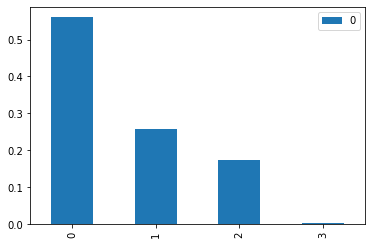

In [39]:
EVR = pd.DataFrame(pca.explained_variance_ratio_)
EVR.plot(kind = 'bar')

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sampler = SMOTE(sampling_strategy = 0.8)

Xs, ys = sampler.fit_resample(components_df, y)

Counter(ys)

Counter({0: 1579, 1: 1263})

In [41]:
X = Xs
y = ys

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [43]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()

alphas = model_DT.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']

In [44]:
from sklearn.model_selection import RandomizedSearchCV

parameters1 = {
            'ccp_alpha' : alphas
}

modelDTCV = RandomizedSearchCV(estimator = model_DT, param_distributions = parameters1, n_iter = 10, cv = 5, verbose = 1,
                              n_jobs = -1, scoring = 'accuracy')

modelDTCV.fit(X_train, y_train)

print('Best parameters :', modelDTCV.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters : {'ccp_alpha': 0.0003299604047514298}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished


In [45]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = RandomForestClassifier()

parameters2 = {
            'n_estimators' : [int(x) for x in np.linspace(200, 2000, 10)],
            'max_features' : ['sqrt', 'log2', 'auto'],
            'max_depth' : [int(x) for x in np.arange(10, 100, 10)],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4]
}


RFCV = RandomizedSearchCV(estimator = model, param_distributions = parameters2, n_iter = 5, cv = 5, verbose = 1,
                          n_jobs = -1)

RFCV.fit(X_train, y_train)

print('Best parameters :', RFCV.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   47.1s finished


Best parameters : {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80}


In [46]:
from sklearn.metrics import accuracy_score

predictions = RFCV.predict(X_test)

ac = accuracy_score(predictions, y_test)

print('accuracy_score :', ac)

accuracy_score : 0.8541300527240774


In [47]:
from sklearn.metrics import classification_report

cr = classification_report(predictions, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       303
           1       0.87      0.81      0.84       266

    accuracy                           0.85       569
   macro avg       0.86      0.85      0.85       569
weighted avg       0.86      0.85      0.85       569



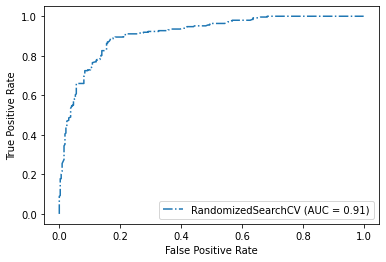

In [48]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(RFCV, X_test, y_test, linestyle = 'dashdot')

In [49]:
from joblib import dump

dump(RFCV, r'/kaggle/working/RFClassifier.joblib')

['/kaggle/working/RFClassifier.joblib']